In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Reload the CSV file into a DataFrame with correct column names
iris_df = pd.read_csv('/content/gdrive/MyDrive/PGSS2023/Week01/Week01/iris.csv',
                      names=["Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species"])

# Display the first few rows of the DataFrame
iris_df.head()

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Display basic statistics
basic_stats = iris_df.describe(include='all')

# Count the number of instances for each species
species_counts = iris_df["Species"].value_counts()

basic_stats, species_counts

(        Petal.Length  Petal.Width  Sepal.Length  Sepal.Width      Species
 count     150.000000   150.000000    150.000000   150.000000          150
 unique           NaN          NaN           NaN          NaN            3
 top              NaN          NaN           NaN          NaN  Iris-setosa
 freq             NaN          NaN           NaN          NaN           50
 mean        5.843333     3.054000      3.758667     1.198667          NaN
 std         0.828066     0.433594      1.764420     0.763161          NaN
 min         4.300000     2.000000      1.000000     0.100000          NaN
 25%         5.100000     2.800000      1.600000     0.300000          NaN
 50%         5.800000     3.000000      4.350000     1.300000          NaN
 75%         6.400000     3.300000      5.100000     1.800000          NaN
 max         7.900000     4.400000      6.900000     2.500000          NaN,
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

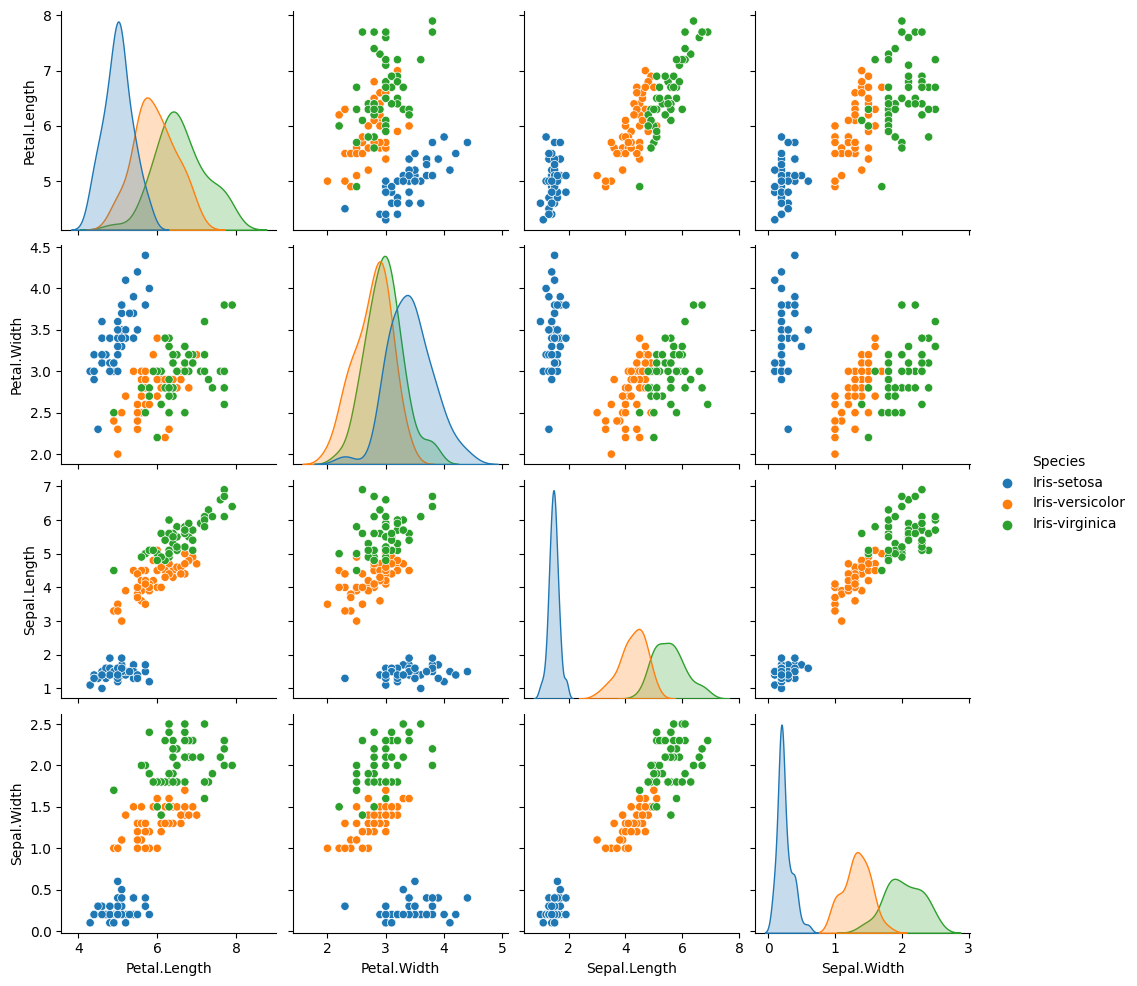

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot to visualize the distributions and relationships between different features for each species
sns.pairplot(iris_df, hue="Species")
plt.show()

In [ ]:
"""
Please use an appropriate statistical test to explore the hypotheses related to the species categorical levels, defined below:

1. Petal Length Hypothesis: The average petal length differs significantly between the species.
2. Petal Width Hypothesis: The average petal width differs significantly between the species.
3. Sepal Length Hypothesis: The average sepal length differs significantly between the species.
4. Sepal Width Hypothesis: The average sepal width differs significantly between the species.
"""

#explore petal length hypothesis
from scipy.stats import f_oneway
setosa_petal_length = iris_df[iris_df["Species"] == "Iris-setosa"]["Petal.Length"]
versicolor_petal_length = iris_df[iris_df["Species"] == "Iris-versicolor"]["Petal.Length"]
virginica_petal_length = iris_df[iris_df["Species"] == "Iris-virginica"]["Petal.Length"]
f_oneway(setosa_petal_length, versicolor_petal_length, virginica_petal_length)

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [ ]:
# Explore Petal Length Hypothesis: The average petal length differs significantly between the species.
# import statsmodels.api         as sm
# from statsmodels.formula.api   import ols
# mod_f_t = ols(formula='Petal.Length ~ Sepal.Width + Sepal.Length + Petal.Width + Species', data = iris_df)
# res_f_t = mod_f_t.fit()
# print(res_f_t.summary())

import pandas as pd
from scipy.stats import shapiro, levene, f_oneway

# Load the CSV file into a DataFrame
# iris_df = pd.read_csv('iris.csv', names=["Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species"])

# Check normality
_, p_shapiro_setosa = shapiro(iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'])
_, p_shapiro_versicolor = shapiro(iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'])
_, p_shapiro_virginica = shapiro(iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length'])


# Log transform the continuous variable to help ensure homoscedacticity
import numpy as np
iris_df['Petal.Length.Log'] = np.log(iris_df['Petal.Length'])

# Check homogeneity of variances
_, p_levene = levene(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

# Perform ANOVA
_, p_anova = f_oneway(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

p_shapiro_setosa, p_shapiro_versicolor, p_shapiro_virginica, p_levene, p_anova

(0.4595010578632355,
 0.4647378921508789,
 0.25831347703933716,
 0.0022585277836218586,
 1.6696691907693826e-31)

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each pair of species
_, p_mannwhitneyu_setosa_versicolor = mannwhitneyu(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length']
)

_, p_mannwhitneyu_setosa_virginica = mannwhitneyu(
    iris_df[iris_df['Species'] == 'Iris-setosa']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

_, p_mannwhitneyu_versicolor_virginica = mannwhitneyu(
    iris_df[iris_df['Species'] == 'Iris-versicolor']['Petal.Length'],
    iris_df[iris_df['Species'] == 'Iris-virginica']['Petal.Length']
)

p_mannwhitneyu_setosa_versicolor, p_mannwhitneyu_setosa_virginica, p_mannwhitneyu_versicolor_virginica

(8.34582714594069e-14, 6.396699069396538e-17, 5.869006410664197e-07)

In [ ]:
# Build a decision tree classifier for Species using Petal.Length as a feature
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Petal.Length']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred=entropyClf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


In [ ]:
!pip install dtreeviz

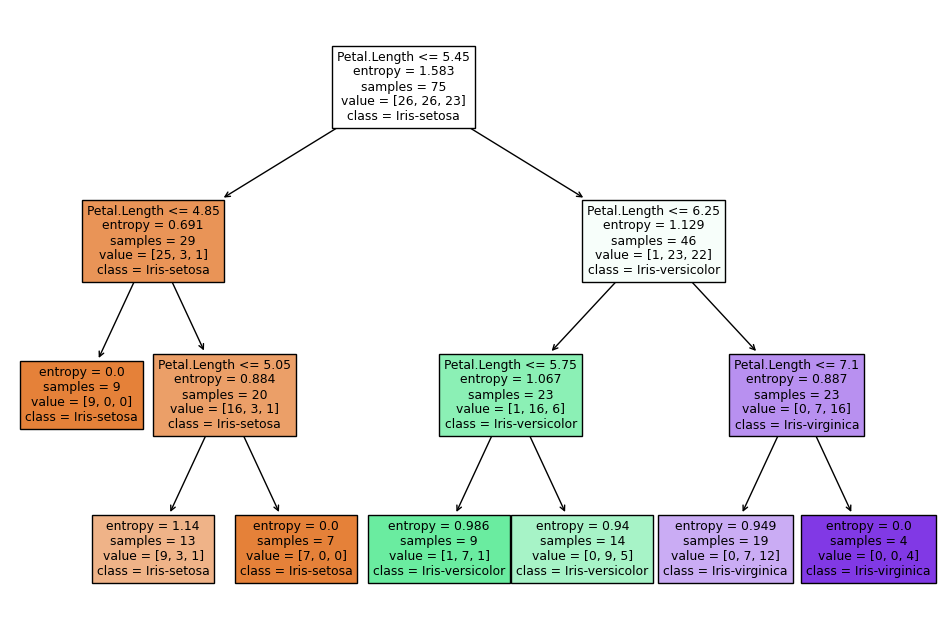

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(entropyClf, filled=True, feature_names=['Petal.Length'], class_names=labelencoder.classes_)
plt.show()

In [ ]:
# 5 fold cross validation result
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(entropyClf, x, y, cv=5)

# Compute the mean accuracy
mean_accuracy = scores.mean()

mean_accuracy

0.72

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       0.87      0.90      0.88        50
Iris-versicolor       0.64      0.46      0.53        50
 Iris-virginica       0.65      0.80      0.71        50

       accuracy                           0.72       150
      macro avg       0.72      0.72      0.71       150
   weighted avg       0.72      0.72      0.71       150



In [20]:
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Petal.Width']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
y_pred=entropyClf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.56


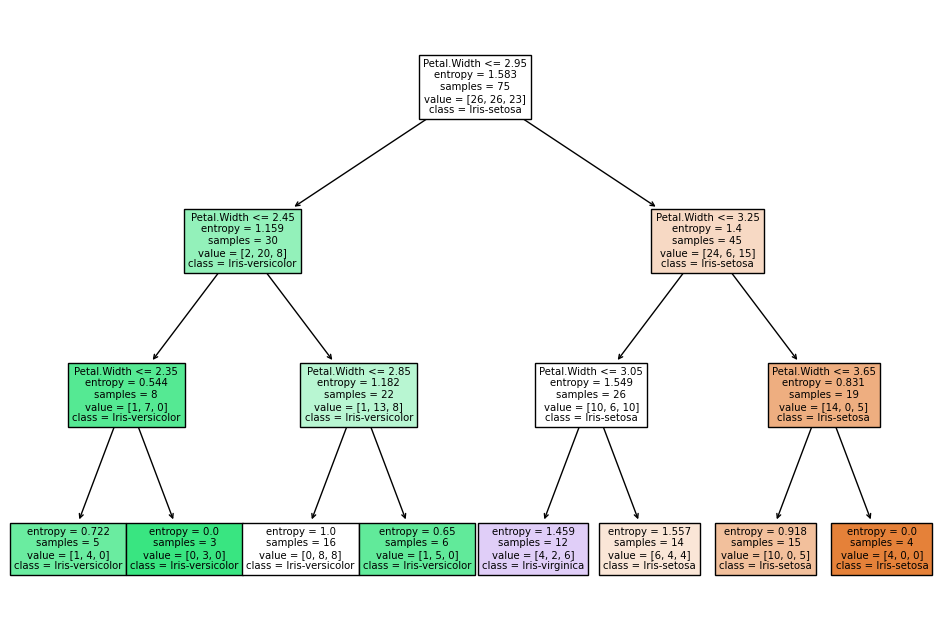

In [22]:
plt.figure(figsize=(12,8))
plot_tree(entropyClf, filled=True, feature_names=['Petal.Width'], class_names=labelencoder.classes_)
plt.show()

In [23]:
# Build a decision tree classifier for Species using Petal.Length as a feature
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Petal.Length', "Petal.Width", "Sepal.Length", "Sepal.Width"]]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
y_pred=entropyClf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9733333333333334


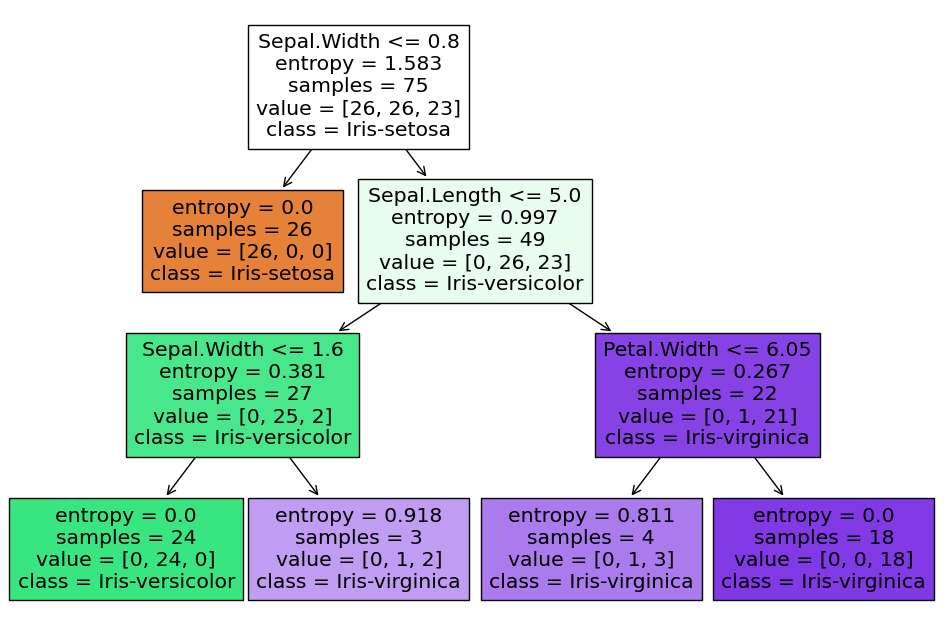

In [26]:
plt.figure(figsize=(12,8))
plot_tree(entropyClf, filled=True, feature_names=['Petal.Width', "Petal.Width", "Sepal.Length", "Sepal.Width"], class_names=labelencoder.classes_)
plt.show()

In [27]:
# 5 fold cross validation result
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(entropyClf, x, y, cv=5)

# Compute the mean accuracy
mean_accuracy = scores.mean()

mean_accuracy

0.96

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.92      0.94        50
 Iris-virginica       0.92      0.96      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



Accuracy: 0.9066666666666666


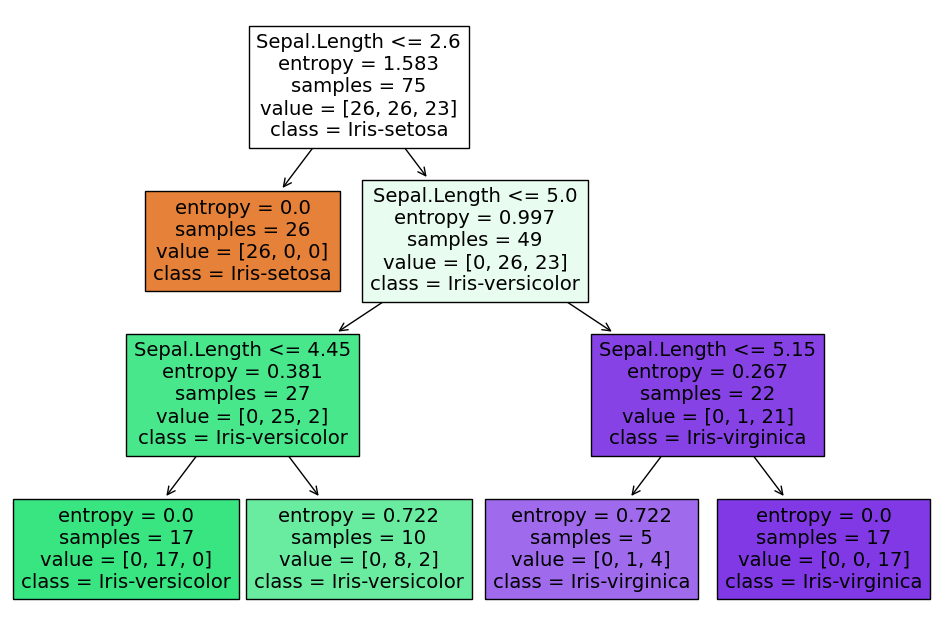

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.88      0.92        50
 Iris-virginica       0.89      0.96      0.92        50

       accuracy                           0.95       150
      macro avg       0.95      0.95      0.95       150
   weighted avg       0.95      0.95      0.95       150



In [30]:
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Sepal.Length']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)
y_pred=entropyClf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(12,8))
plot_tree(entropyClf, filled=True, feature_names=['Sepal.Length'], class_names=labelencoder.classes_)
plt.show()


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

Accuracy: 0.9733333333333334


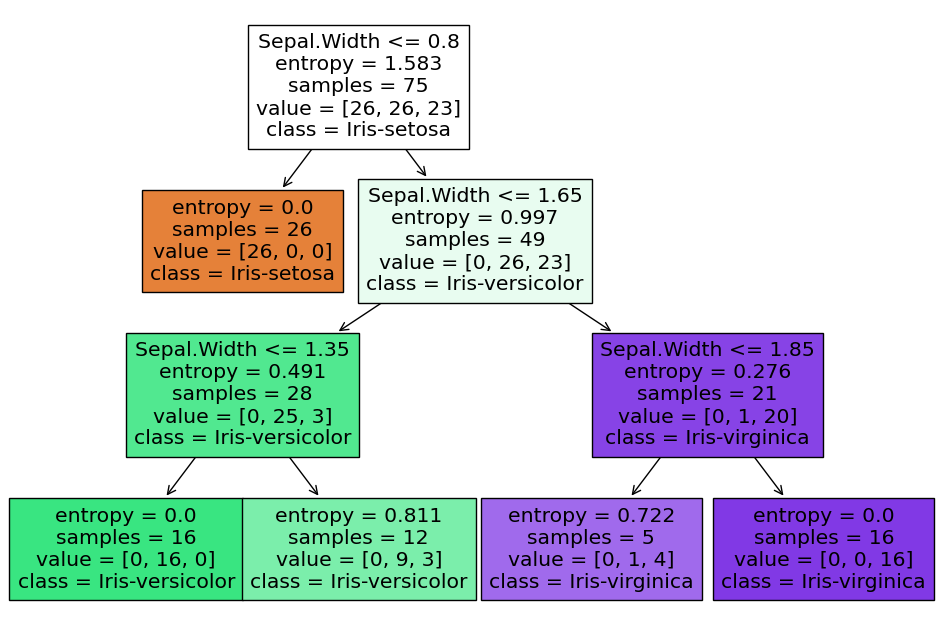

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.90      0.92      0.91        50
 Iris-virginica       0.92      0.90      0.91        50

       accuracy                           0.94       150
      macro avg       0.94      0.94      0.94       150
   weighted avg       0.94      0.94      0.94       150



In [31]:
#Rewrite the above code to to use Sepal.Width instead of Petal.Length.
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn import metrics
x = iris_df[['Sepal.Width']]
y = iris_df['Species']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5)
entropyClf=DecisionTreeClassifier(criterion="entropy",  max_depth=3)
entropyClf.fit(x_train,y_train)
y_pred=entropyClf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(12,8))
plot_tree(entropyClf, filled=True, feature_names=['Sepal.Width'], class_names=labelencoder.classes_)
plt.show()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Generate cross-validated predictions for each data point
y_pred = cross_val_predict(entropyClf, x, y, cv=5)

# Print a classification report showing precision, recall, and F1-score per class
print(classification_report(y, y_pred, target_names=labelencoder.classes_))

In [1]:
#plot the variable importances corresponding to entropyClf as a bar plot
import matplotlib.pyplot as plt
import numpy as np
importances = entropyClf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

NameError: name 'entropyClf' is not defined